In [39]:
# Librerias
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [40]:

IMAGE_SIZE=256
BATCH_SIZE=32
EPOCHS=50
CHANNELS=3

In [41]:

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "./train",
    shuffle=True,
    seed=123,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "./test",
    shuffle=True,
    seed=123,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 11879 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [42]:
class_names=dataset.class_names
class_names

['Benign', 'Malignant']

In [43]:
# Train,validation and Test split

def get_dataset_partitation(ds,train_split=0.8, valid_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split + valid_split + test_split == 1)
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(ds_size * train_split)
    test_size = int(ds_size * test_split)
    valid_size = int(ds_size * valid_split)
    train_ds = ds.take(train_size)
    valid_ds = ds.skip(train_size).take(valid_size)
    test_ds = ds.skip(train_size).skip(valid_size)

    return train_ds,valid_ds,test_ds

In [44]:
train_ds,valid_ds,test_ds = get_dataset_partitation(dataset)

In [45]:
# print(len(train_ds))
# print(len(test_ds))
# print(len(valid_ds))

In [46]:
# Optimizar obtencion de datos
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Resize and Rescale
resize_and_rescale=tf.keras.Sequential(
    [
        layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
        layers.Rescaling(1./255)
    ]
)

In [47]:
# Aumento de datos
data_augmentation=tf.keras.Sequential(
   [ layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3)]
)

In [48]:
# Construccion del modelo
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [49]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [50]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=valid_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 277s 823ms/step - accuracy: 0.6434 - loss: 0.6166 - val_accuracy: 0.8277 - val_loss: 0.4301
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 213s 718ms/step - accuracy: 0.7978 - loss: 0.4418 - val_accuracy: 0.8125 - val_loss: 0.4049
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 197s 662ms/step - accuracy: 0.8187 - loss: 0.4177 - val_accuracy: 0.8361 - val_loss: 0.3671
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 196s 659ms/step - accuracy: 0.8282 - loss: 0.3842 - val_accuracy: 0.8142 - val_loss: 0.3771
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 195s 656ms/step - accuracy: 0.8344 - loss: 0.3766 - val_accuracy: 0.8480 - val_loss: 0.3439
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 196s 660ms/step - accuracy: 0.8367 - loss: 0.3674 - val_accuracy: 0.8497 - val_loss: 0.3390
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 195s 658ms/step - accuracy: 0.8481 - loss: 0.3489 - val_accuracy: 0.8454 - val_loss: 0.3313
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 195s 655ms/step - accuracy: 0.8477 -

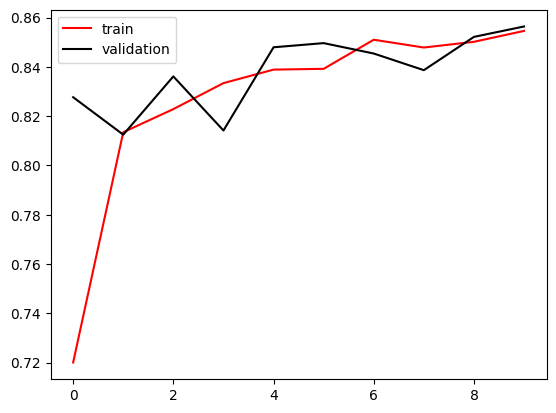

In [51]:
# Model Accuracy Plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='black',label='validation')
plt.legend()
plt.show()

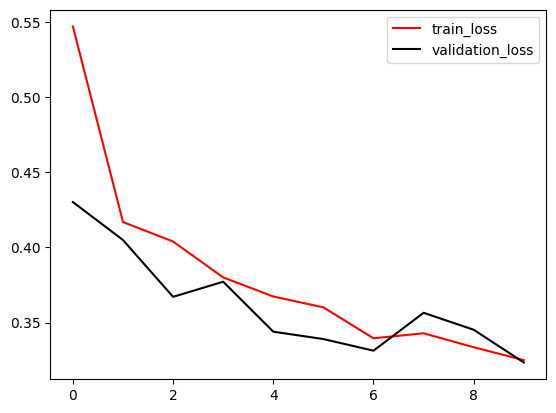

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train_loss')
plt.plot(history.history['val_loss'],color='black',label='validation_loss')
plt.legend()
plt.show()

In [53]:
# Accuracy
scores = model.evaluate(test_ds)
scores_test = model.evaluate(test_dataset)

print(scores)
print(scores_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 274ms/step - accuracy: 0.8452 - loss: 0.3419
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.8765 - loss: 0.3227
[0.3283911645412445, 0.8453947305679321]
[0.3234047293663025, 0.8774999976158142]


In [54]:
# Predict
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Actual vs Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

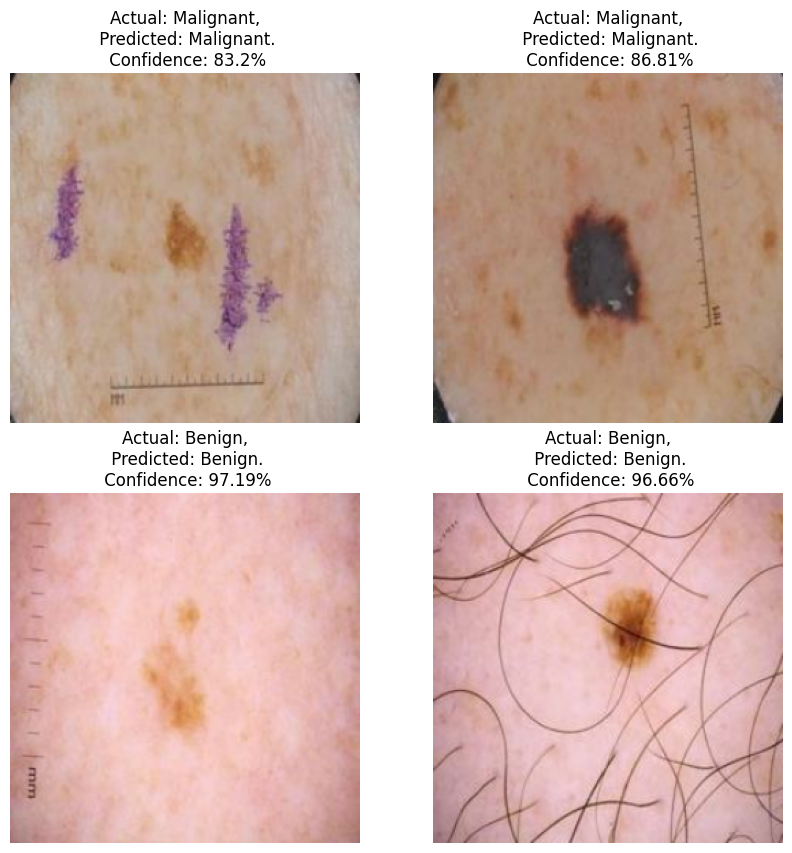

In [55]:
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(10):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones del conjunto de prueba
y_pred = []
y_true = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # Labels verdaderos
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=-1))  # Predicciones del modelo

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

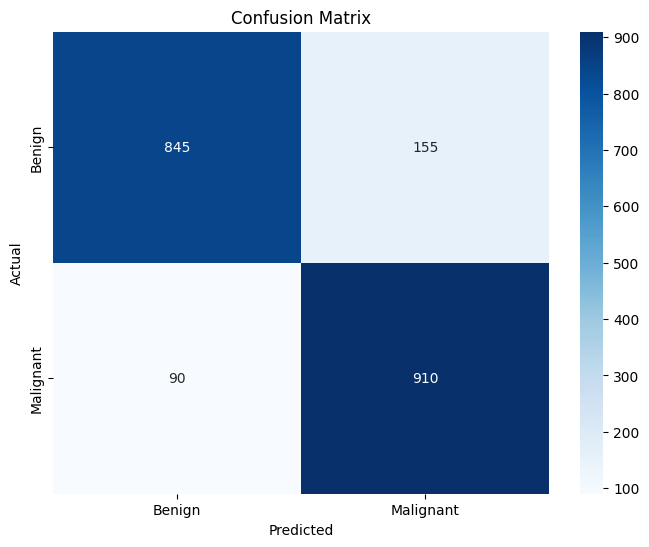

In [57]:
# Construir la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión usando un heatmap de seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()